In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.DataFrame(pd.read_csv("/content/DailyDelhiClimateTrain[1].csv"))

In [3]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
df['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2016-12-30',
       '2016-12-31', '2017-01-01'], dtype=object)

<Axes: xlabel='date', ylabel='meantemp'>

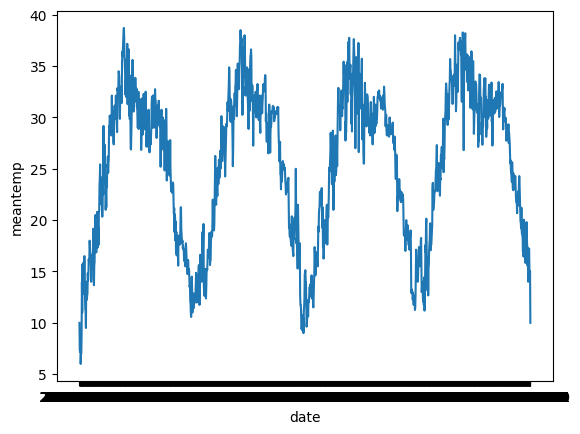

In [5]:
sns.lineplot(x=df['date'],y=df['meantemp'],data=df)

<Axes: xlabel='date', ylabel='humidity'>

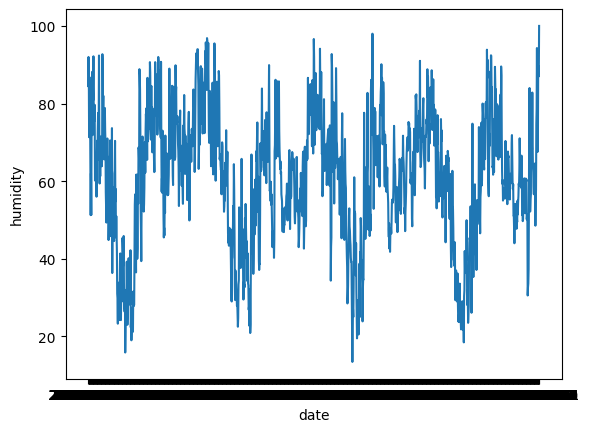

In [6]:
sns.lineplot(x=df['date'],y=df['humidity'],data=df)

<Axes: xlabel='date', ylabel='wind_speed'>

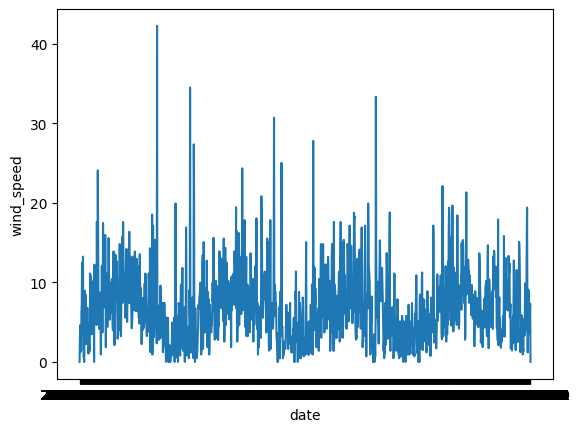

In [7]:
sns.lineplot(x=df['date'],y=df['wind_speed'],data=df)

<Axes: xlabel='date', ylabel='meanpressure'>

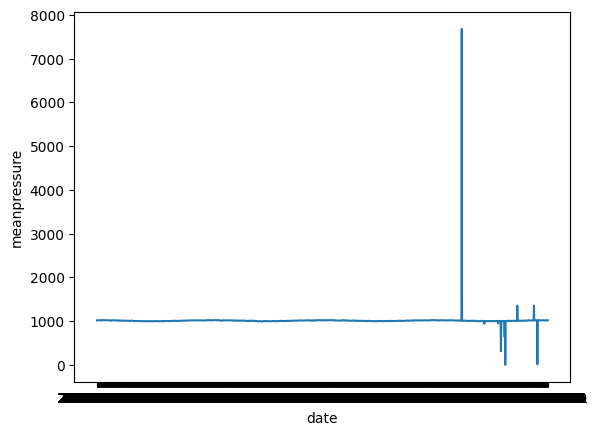

In [8]:
sns.lineplot(x=df['date'],y=df['meanpressure'],data=df)


**AS WE CAN SEE, except mean_preassure, all the 4 other parameters are time-dependant features. Time-series analysis and forecasting has to be performed for accurate predictions.This conclusion has been made by looking at the periodic trends in the above plots.
**

In [9]:
df=pd.DataFrame(pd.read_csv("/content/DailyDelhiClimateTrain[1].csv"))

In [10]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)  # Set date as the index


In [11]:
window_size = 7
for i in range(1, window_size + 1):
    df[f'temp_lag_{i}'] = df['meantemp'].shift(i)
    df[f'humidity_lag_{i}'] = df['humidity'].shift(i)
    df[f'wind_lag_{i}'] = df['wind_speed'].shift(i)


In [12]:
df['target'] = df['meantemp'].shift(-1)


In [13]:
df

,meantemp,humidity,wind_speed,meanpressure,temp_lag_1,humidity_lag_1,wind_lag_1,temp_lag_2,humidity_lag_2,wind_lag_2,...,temp_lag_5,humidity_lag_5,wind_lag_5,temp_lag_6,humidity_lag_6,wind_lag_6,temp_lag_7,humidity_lag_7,wind_lag_7,target
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000
2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.166667
2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,10.000000,84.500000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,7.400000,92.000000,2.980000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,7.166667,87.000000,4.633333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,17.142857,74.857143,8.784211,...,15.550000,74.700000,1.205000,17.285714,57.857143,6.180952,18.050000,54.300000,19.404762,15.238095
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,16.850000,67.550000,8.335000,...,17.318182,78.636364,5.236364,15.550000,74.700000,1.205000,17.285714,57.857143,6.180952,14.095238
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,17.217391,68.043478,3.547826,...,14.000000,94.300000,9.085000,17.318182,78.636364,5.236364,15.550000,74.700000,1.205000,15.052632


In [14]:
df = df.dropna()


In [15]:
df

,meantemp,humidity,wind_speed,meanpressure,temp_lag_1,humidity_lag_1,wind_lag_1,temp_lag_2,humidity_lag_2,wind_lag_2,...,temp_lag_5,humidity_lag_5,wind_lag_5,temp_lag_6,humidity_lag_6,wind_lag_6,temp_lag_7,humidity_lag_7,wind_lag_7,target
date,,,,,,,,,,,,,,,,,,,,,
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,7.000000,82.800000,1.480000,...,7.166667,87.000000,4.633333,7.400000,92.000000,2.980000,10.000000,84.500000,0.000000,14.000000
2013-01-09,14.000000,51.250000,12.500000,1017.000000,8.857143,63.714286,7.142857,7.000000,78.600000,6.300000,...,8.666667,71.333333,1.233333,7.166667,87.000000,4.633333,7.400000,92.000000,2.980000,11.000000
2013-01-10,11.000000,62.000000,7.400000,1015.666667,14.000000,51.250000,12.500000,8.857143,63.714286,7.142857,...,6.000000,86.833333,3.700000,8.666667,71.333333,1.233333,7.166667,87.000000,4.633333,15.714286
2013-01-11,15.714286,51.285714,10.571429,1016.142857,11.000000,62.000000,7.400000,14.000000,51.250000,12.500000,...,7.000000,82.800000,1.480000,6.000000,86.833333,3.700000,8.666667,71.333333,1.233333,14.000000
2013-01-12,14.000000,74.000000,13.228571,1015.571429,15.714286,51.285714,10.571429,11.000000,62.000000,7.400000,...,7.000000,78.600000,6.300000,7.000000,82.800000,1.480000,6.000000,86.833333,3.700000,15.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,14.000000,94.300000,9.085000,...,17.285714,57.857143,6.180952,18.050000,54.300000,19.404762,19.800000,48.533333,15.926667,17.217391
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,17.142857,74.857143,8.784211,...,15.550000,74.700000,1.205000,17.285714,57.857143,6.180952,18.050000,54.300000,19.404762,15.238095
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,16.850000,67.550000,8.335000,...,17.318182,78.636364,5.236364,15.550000,74.700000,1.205000,17.285714,57.857143,6.180952,14.095238


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

# Splitting into train and test sets (e.g., 80%-20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [17]:
X_train

,meantemp,humidity,wind_speed,meanpressure,temp_lag_1,humidity_lag_1,wind_lag_1,temp_lag_2,humidity_lag_2,wind_lag_2,...,wind_lag_4,temp_lag_5,humidity_lag_5,wind_lag_5,temp_lag_6,humidity_lag_6,wind_lag_6,temp_lag_7,humidity_lag_7,wind_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,7.000000,82.800000,1.480000,...,1.233333,7.166667,87.000000,4.633333,7.400000,92.000000,2.980000,10.000000,84.500000,0.000000
2013-01-09,14.000000,51.250000,12.500000,1017.000000,8.857143,63.714286,7.142857,7.000000,78.600000,6.300000,...,3.700000,8.666667,71.333333,1.233333,7.166667,87.000000,4.633333,7.400000,92.000000,2.980000
2013-01-10,11.000000,62.000000,7.400000,1015.666667,14.000000,51.250000,12.500000,8.857143,63.714286,7.142857,...,1.480000,6.000000,86.833333,3.700000,8.666667,71.333333,1.233333,7.166667,87.000000,4.633333
2013-01-11,15.714286,51.285714,10.571429,1016.142857,11.000000,62.000000,7.400000,14.000000,51.250000,12.500000,...,6.300000,7.000000,82.800000,1.480000,6.000000,86.833333,3.700000,8.666667,71.333333,1.233333
2013-01-12,14.000000,74.000000,13.228571,1015.571429,15.714286,51.285714,10.571429,11.000000,62.000000,7.400000,...,7.142857,7.000000,78.600000,6.300000,7.000000,82.800000,1.480000,6.000000,86.833333,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-11,25.066667,67.800000,6.546667,1012.533333,25.562500,57.437500,7.981250,24.000000,57.562500,9.375000,...,5.171429,22.812500,66.562500,5.218750,23.933333,57.133333,11.000000,27.312500,44.250000,6.143750
2016-03-12,24.562500,66.937500,9.487500,1009.562500,25.066667,67.800000,6.546667,25.562500,57.437500,7.981250,...,6.742857,23.714286,64.142857,5.171429,22.812500,66.562500,5.218750,23.933333,57.133333,11.000000
2016-03-13,24.250000,65.187500,6.843750,1011.187500,24.562500,66.937500,9.487500,25.066667,67.800000,6.546667,...,9.375000,23.428571,60.214286,6.742857,23.714286,64.142857,5.171429,22.812500,66.562500,5.218750


In [18]:
y_train

,target
date,
2013-01-08,14.000000
2013-01-09,11.000000
2013-01-10,15.714286
2013-01-11,14.000000
2013-01-12,15.833333
...,...
2016-03-11,24.562500
2016-03-12,24.250000
2016-03-13,22.375000


# Using a Recurrent Neural Network-LSTM to build model for the prediction of temperatures, using window-size of 7 and horizon size of 1. Considering a multivariate time series model of datetime, meantemperature, preassure, and humidity.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the entire DataFrame except the date index
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)


In [20]:
# Convert to 3D tensors
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        seq = data[i:i+window_size, :-1]
        label = data[i+window_size, -1]  # 'target' is the last column
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences
data = scaled_df.to_numpy()
X, y = create_sequences(data, window_size)


In [21]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1121 - val_loss: 0.0072
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - val_loss: 0.0048
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 0.0049
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0046
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 0.0043
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0044
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - val_loss: 0.0040


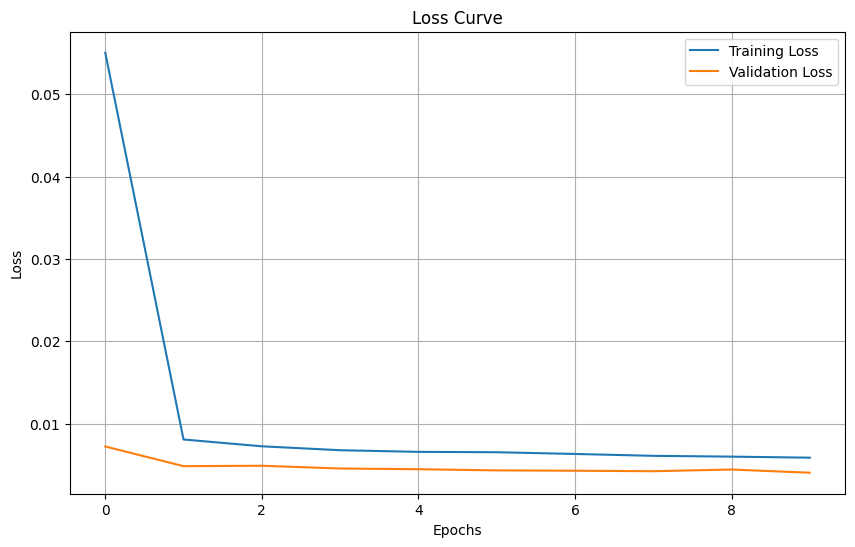

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
# Train the model and store the training history
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
)

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Rescale predictions and true values back to original scale
y_pred_rescaled = scaler.inverse_transform([[0]*len(df.columns[:-1]) + [pred[0]] for pred in y_pred])[:, -1]
y_test_rescaled = scaler.inverse_transform([[0]*len(df.columns[:-1]) + [true] for true in y_test])[:, -1]

# Evaluate
rmse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 4.989318441568777
R² Score: 0.8446875049592245


**As we can see, RNN's , LSTM in this case performed wonderfully and resulted in perfect r2 score of about 84% and very less mean squared error of 5 units. As expected, time-series modelling suited the data perfectly.**

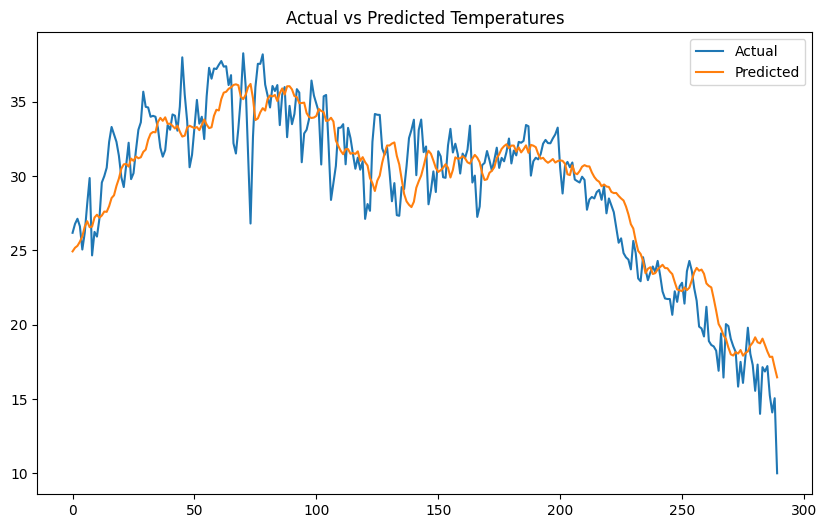

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Temperatures")
plt.show()


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

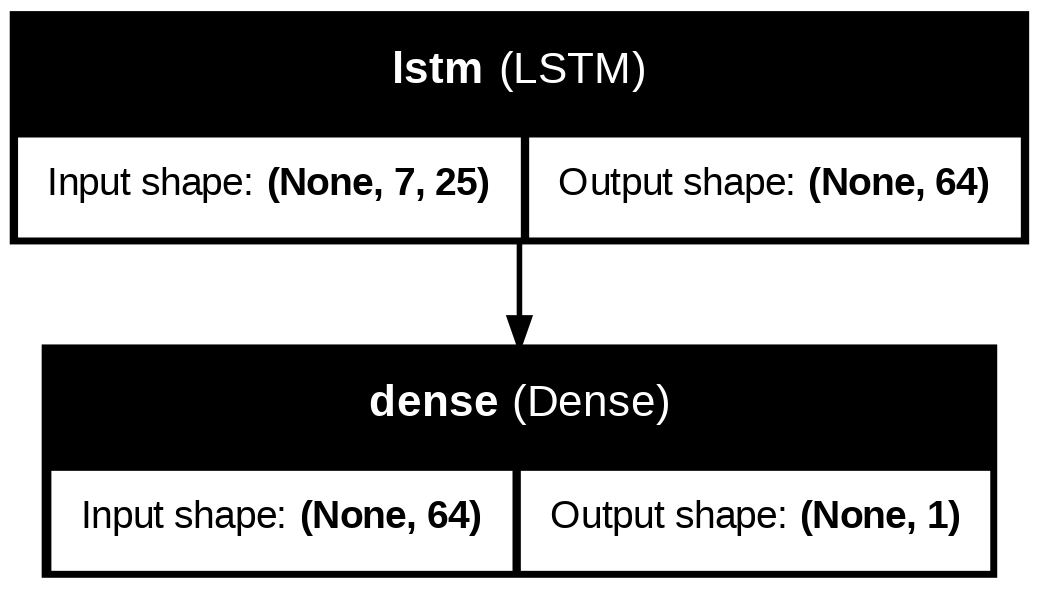

In [26]:
plot_model(
    model,
    to_file='model_plot.png',  # Saves the plot to a file
    show_shapes=True,          # Show the shapes of the layers
    show_layer_names=True      # Show the names of the layers
)

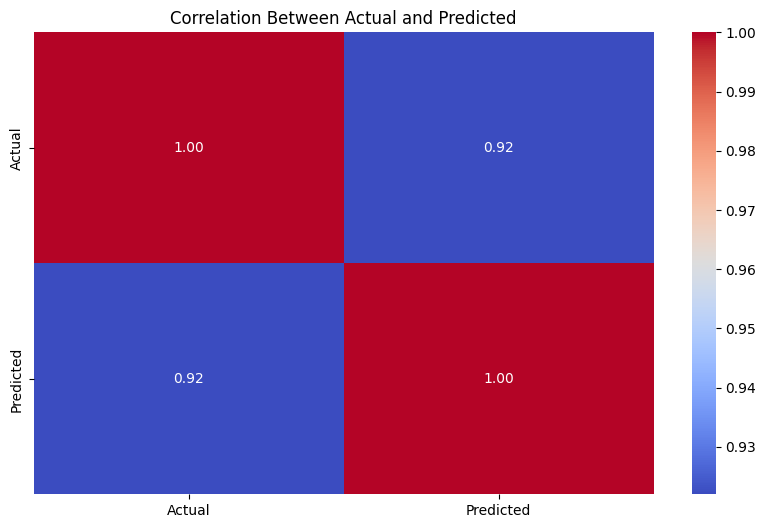

In [31]:
# Create a DataFrame for actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test_rescaled, 'Predicted': y_pred_rescaled})

# Plot a heatmap of residuals (errors)
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Actual and Predicted')
plt.show()


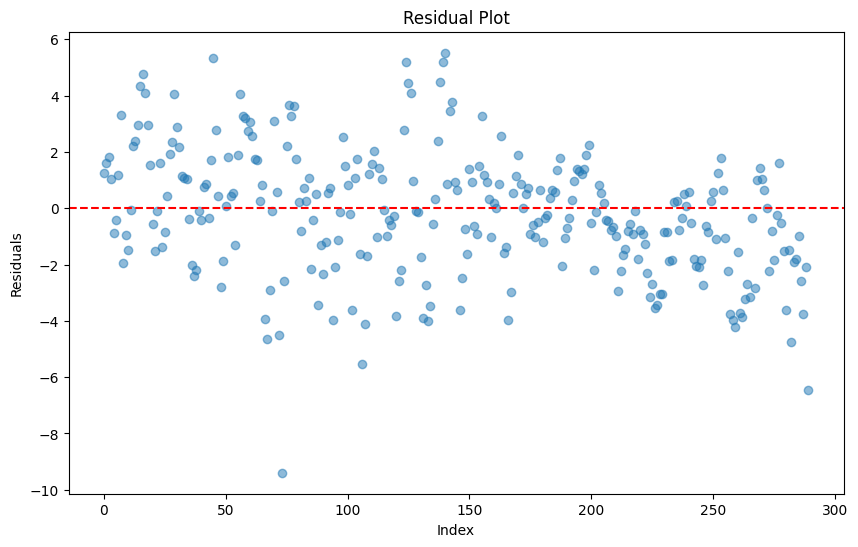

In [32]:
residuals = y_test_rescaled - y_pred_rescaled
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.show()


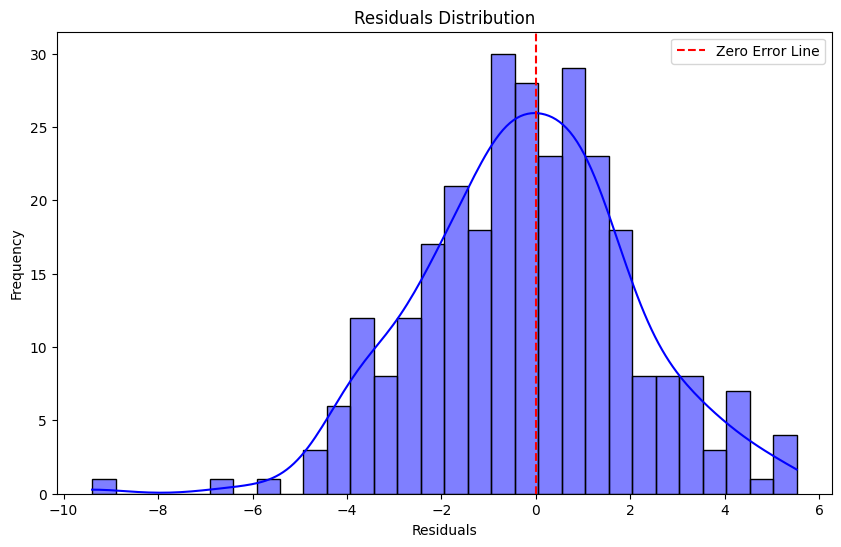

In [33]:
# Calculate residuals
residuals = y_test_rescaled - y_pred_rescaled

# Plot the histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()
